In [12]:
import random
timeFrame = 24

def gen():
    return round(random.uniform(1,timeFrame), 2)



In [13]:
MAX_IN_FRAME = 3

def addPost(postList, newPost):
    postsAhead = [p for p in postList if (p['t']<= newPost['t'] + 1 and p['t'] >= newPost['t'])]
    postsBack = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'])]
    
    if (len(postsAhead) + 1 > MAX_IN_FRAME):
        print(f"Cant add newPost: {newPost}, over limit of upper group")
        return sorted(postList, key=lambda x: x['t'])
    if (len(postsBack) + 1 > MAX_IN_FRAME):
        print(f"Cant add newPost: {newPost}, over limit of lower group")
        return sorted(postList, key=lambda x: x['t'])
    
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [3]:
def addPostMultiCheck(postList, newPost):   
    postGroup = [p for p in postList if (p['t'] >= newPost['t'] - 1 and p['t'] <= newPost['t'] + 1)]
    sortedGroup = sorted(postGroup, key=lambda x: x['t'])
    
    while len(sortedGroup) >= MAX_IN_FRAME:
        window = sortedGroup.pop(0)['t'] + 1
        if (len(list(filter(lambda p: p['t'] <= window, sortedGroup))) + 1 > MAX_IN_FRAME):
            print(f"Cant add newPost: {newPost}, over limit of group up to t: {window}")
            return sorted(postList, key=lambda x: x['t'])
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])

In [4]:
def addPostFullScan(postList, newPost):
    postRadius = [p for p in postList if (p['t'] <= newPost['t'] +1 and p['t'] >= newPost['t'] - 1)]
    newState = sorted((postRadius + [newPost]), key=lambda x: x['t'])
    print(newState)
    for post in newState:
        postsAhead = [p for p in newState if (p['t']<= post['t'] + 1 and p['t'] >= post['t'])]
        print(f"ahead: {postsAhead}")
        postsBack = [p for p in newState if (p['t'] >= post['t'] - 1 and p['t'] <= post['t'])]
        print(f"back: {postsBack}")
        
        if len(postsAhead) > MAX_IN_FRAME:
            print("cant add")
            return postList
        if len(postsBack) > MAX_IN_FRAME:
            print("cant add")
            return postList
    postList.append(newPost)
    return sorted(postList, key=lambda x: x['t'])
    


In [123]:
def addPostSlidingCheck(postList, newPost):
    return
    

In [5]:
def checkPosts(posts):
    for post in posts:
        print(post)
        postsBack = [p for p in posts if (p['t'] >= post['t'] - 1 and p['t'] <= post['t'])]
        print(f"postsBack: {postsBack}")
        postsAhead = [p for p in posts if (p['t']<= post['t'] + 1 and p['t'] >= post['t'])]
        print(f"postsAhead: {postsAhead}")
        if(len(postsBack) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of lower time frame: {postsBack}")
        if(len(postsAhead) > MAX_IN_FRAME):
            print(f"ERROR: post {post} over limit of upper time frame: {postsAhead}")
        print("***********************")

In [6]:
testGroup1 = []
testGroup2 = []
testGroup3 = []

for i in range(0, 50):
    newPost = {'t': gen()}
    print(f"Adding: {newPost}")
    # testGroup1 = addPost(testGroup1, newPost)
    testGroup3 = addPostFullScan(testGroup3, newPost)
#   testGroup2 = addPostMultiCheck(testGroup2, newPost)
    print("------------------------------")
    

Adding: {'t': 12.59}
[{'t': 12.59}]
ahead: [{'t': 12.59}]
back: [{'t': 12.59}]
------------------------------
Adding: {'t': 13.1}
[{'t': 12.59}, {'t': 13.1}]
ahead: [{'t': 12.59}, {'t': 13.1}]
back: [{'t': 12.59}]
ahead: [{'t': 13.1}]
back: [{'t': 12.59}, {'t': 13.1}]
------------------------------
Adding: {'t': 12.42}
[{'t': 12.42}, {'t': 12.59}, {'t': 13.1}]
ahead: [{'t': 12.42}, {'t': 12.59}, {'t': 13.1}]
back: [{'t': 12.42}]
ahead: [{'t': 12.59}, {'t': 13.1}]
back: [{'t': 12.42}, {'t': 12.59}]
ahead: [{'t': 13.1}]
back: [{'t': 12.42}, {'t': 12.59}, {'t': 13.1}]
------------------------------
Adding: {'t': 21.96}
[{'t': 21.96}]
ahead: [{'t': 21.96}]
back: [{'t': 21.96}]
------------------------------
Adding: {'t': 7.19}
[{'t': 7.19}]
ahead: [{'t': 7.19}]
back: [{'t': 7.19}]
------------------------------
Adding: {'t': 7.91}
[{'t': 7.19}, {'t': 7.91}]
ahead: [{'t': 7.19}, {'t': 7.91}]
back: [{'t': 7.19}]
ahead: [{'t': 7.91}]
back: [{'t': 7.19}, {'t': 7.91}]
--------------------------

In [73]:
testGroup1

[]

In [7]:
testGroup3

[{'t': 1.11},
 {'t': 1.17},
 {'t': 1.73},
 {'t': 2.39},
 {'t': 2.56},
 {'t': 3.47},
 {'t': 4.64},
 {'t': 4.87},
 {'t': 5.99},
 {'t': 6.52},
 {'t': 6.87},
 {'t': 7.19},
 {'t': 7.54},
 {'t': 7.91},
 {'t': 8.61},
 {'t': 8.63},
 {'t': 9.14},
 {'t': 11.73},
 {'t': 12.42},
 {'t': 12.59},
 {'t': 13.1},
 {'t': 13.84},
 {'t': 13.89},
 {'t': 14.68},
 {'t': 16.74},
 {'t': 16.8},
 {'t': 17.32},
 {'t': 17.77},
 {'t': 18.08},
 {'t': 18.39},
 {'t': 18.83},
 {'t': 19.62},
 {'t': 19.93},
 {'t': 20.0},
 {'t': 20.99},
 {'t': 21.96},
 {'t': 22.03},
 {'t': 22.66}]

In [ ]:
import pandas as pd
formatted = [{**x, 'a': 1} for x in testGroup1]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Simple Checks')
ax.set_xlim(0, timeFrame)

In [ ]:
checkPosts(testGroup1)

In [ ]:
formatted = [{**x, 'a': 1} for x in testGroup2]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Multi Checks')
ax.set_xlim(0, timeFrame)

In [83]:
checkPosts(testGroup2)

(0.0, 25.0)

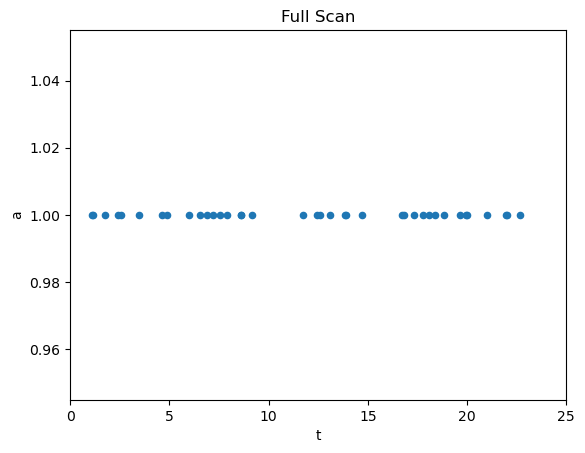

In [10]:
import pandas as pd
formatted = [{**x, 'a': 1} for x in testGroup3]
formatted
df = pd.DataFrame(data=formatted)
ax = df.plot.scatter(x='t', y='a', title='Full Scan')
ax.set_xlim(0, timeFrame)

In [11]:
checkPosts(testGroup3)

{'t': 1.11}
postsBack: [{'t': 1.11}]
postsAhead: [{'t': 1.11}, {'t': 1.17}, {'t': 1.73}]
***********************
{'t': 1.17}
postsBack: [{'t': 1.11}, {'t': 1.17}]
postsAhead: [{'t': 1.17}, {'t': 1.73}]
***********************
{'t': 1.73}
postsBack: [{'t': 1.11}, {'t': 1.17}, {'t': 1.73}]
postsAhead: [{'t': 1.73}, {'t': 2.39}, {'t': 2.56}]
***********************
{'t': 2.39}
postsBack: [{'t': 1.73}, {'t': 2.39}]
postsAhead: [{'t': 2.39}, {'t': 2.56}]
***********************
{'t': 2.56}
postsBack: [{'t': 1.73}, {'t': 2.39}, {'t': 2.56}]
postsAhead: [{'t': 2.56}, {'t': 3.47}]
***********************
{'t': 3.47}
postsBack: [{'t': 2.56}, {'t': 3.47}]
postsAhead: [{'t': 3.47}]
***********************
{'t': 4.64}
postsBack: [{'t': 4.64}]
postsAhead: [{'t': 4.64}, {'t': 4.87}]
***********************
{'t': 4.87}
postsBack: [{'t': 4.64}, {'t': 4.87}]
postsAhead: [{'t': 4.87}]
***********************
{'t': 5.99}
postsBack: [{'t': 5.99}]
postsAhead: [{'t': 5.99}, {'t': 6.52}, {'t': 6.87}]
*******